## Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Ejercicio 1 - Carga de datos

In [2]:
df = pd.read_csv('Data/emision-co2-autos_limpio.csv')


In [3]:
df.head()

,vehiculo_marca,vehiculo_modelo,vehiculo_tipo,vehiculo_traccion,vehiculo_id_motor,vehiculo_cilindrada,vehiculo_potencia,vehiculo_tipo_transmision,vehiculo_tipo_combustible,vehiculo_standard_emision,lca_numero,fecha_firma,ensayo_gei_numero,ensayo_gei_laboratorio,emision_CO2,consumo_urbano,consumo_extraurbano,consumo_mixto,id_etiqueta
0,TOYOTA,LAND CRUISER 200,SUV,4x4,TOYOTA 1VD-FTV,4461.0,NaN,AUTOMATICA,GAS OIL,EURO V,NaN,04/10/2017,H1860666086/241,VINÇOTTE nv,260.70,11.56,8.94,9.90,000001A
1,RENAULT,FLUENCE 2.0 16V,SEDÁN 4 PUERTAS,4x2,RENAULT M4RK7,1997.0,NaN,CVT,NAFTA,EURO V,NaN,22/06/2016,09/09790,UTAC,175.40,10.50,6.10,7.70,000178A
2,RENAULT,DUSTER 2.0 16v,SEDÁN 5 PUERTAS,4x2,RENAULT F4R E4,1998.0,105,MANUAL,NAFTA,EURO V,NaN,NaN,R1-0210/17,DELPHI,198.86,11.13,6.98,8.52,000650C
3,RENAULT,DUSTER 2.0 16v 4X4,SEDÁN 5 PUERTAS,4x4,RENAULT F4R E4,1998.0,105,MANUAL,NAFTA,EURO V,NaN,NaN,R1-0209/17,DELPHI,199.74,11.20,7.01,8.55,000659C
4,CITROËN,DS4,COUPÉ 3 + 2 PUERTAS,4x2,CITROËN EP6CDTM (5FM),1598.0,NaN,AUTOMATICA,NAFTA,EURO V,NaN,11/10/2011,11/04511,UTAC,177.60,10.60,6.00,7.70,000106A


In [5]:
df.dtypes

vehiculo_marca                object
vehiculo_modelo               object
vehiculo_tipo                 object
vehiculo_traccion             object
vehiculo_id_motor             object
vehiculo_cilindrada          float64
vehiculo_potencia             object
vehiculo_tipo_transmision     object
vehiculo_tipo_combustible     object
vehiculo_standard_emision     object
lca_numero                   float64
fecha_firma                   object
ensayo_gei_numero             object
ensayo_gei_laboratorio        object
emision_CO2                  float64
consumo_urbano               float64
consumo_extraurbano          float64
consumo_mixto                float64
id_etiqueta                   object
dtype: object

In [6]:
df.drop(['vehiculo_potencia','lca_numero', 'vehiculo_id_motor','vehiculo_id_motor','fecha_firma','ensayo_gei_numero','ensayo_gei_laboratorio','id_etiqueta'], axis=1, inplace=True)

In [7]:
df.head()

,vehiculo_marca,vehiculo_modelo,vehiculo_tipo,vehiculo_traccion,vehiculo_cilindrada,vehiculo_tipo_transmision,vehiculo_tipo_combustible,vehiculo_standard_emision,emision_CO2,consumo_urbano,consumo_extraurbano,consumo_mixto
0,TOYOTA,LAND CRUISER 200,SUV,4x4,4461.0,AUTOMATICA,GAS OIL,EURO V,260.70,11.56,8.94,9.90
1,RENAULT,FLUENCE 2.0 16V,SEDÁN 4 PUERTAS,4x2,1997.0,CVT,NAFTA,EURO V,175.40,10.50,6.10,7.70
2,RENAULT,DUSTER 2.0 16v,SEDÁN 5 PUERTAS,4x2,1998.0,MANUAL,NAFTA,EURO V,198.86,11.13,6.98,8.52
3,RENAULT,DUSTER 2.0 16v 4X4,SEDÁN 5 PUERTAS,4x4,1998.0,MANUAL,NAFTA,EURO V,199.74,11.20,7.01,8.55
4,CITROËN,DS4,COUPÉ 3 + 2 PUERTAS,4x2,1598.0,AUTOMATICA,NAFTA,EURO V,177.60,10.60,6.00,7.70


In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

vehiculo_marca               0
vehiculo_modelo              0
vehiculo_tipo                0
vehiculo_traccion            0
vehiculo_cilindrada          0
vehiculo_tipo_transmision    0
vehiculo_tipo_combustible    0
vehiculo_standard_emision    0
emision_CO2                  0
consumo_urbano               0
consumo_extraurbano          0
consumo_mixto                0
dtype: int64

In [10]:
df.dtypes

vehiculo_marca                object
vehiculo_modelo               object
vehiculo_tipo                 object
vehiculo_traccion             object
vehiculo_cilindrada          float64
vehiculo_tipo_transmision     object
vehiculo_tipo_combustible     object
vehiculo_standard_emision     object
emision_CO2                  float64
consumo_urbano               float64
consumo_extraurbano          float64
consumo_mixto                float64
dtype: object

In [31]:
df.reset_index(inplace=True)

In [32]:
df.shape

(406, 13)

In [33]:
target = df["emision_CO2"]

In [34]:
df['vehiculo_traccion'].value_counts()

4x2          286
4x4           95
4x2 - 4x4     25
Name: vehiculo_traccion, dtype: int64

In [35]:
df['vehiculo_tipo_transmision'].value_counts()

AUTOMATICA                                     223
MANUAL                                         147
CVT                                             33
E-CVT (Hibrida controlada electrónicamente)      1
CTT                                              1
MANUAL AUTOMATIZADA                              1
Name: vehiculo_tipo_transmision, dtype: int64

In [36]:
target

0      260.70
1      175.40
2      198.86
3      199.74
4      177.60
        ...  
401     99.55
402    120.00
403    186.90
404    163.10
405    192.83
Name: emision_CO2, Length: 406, dtype: float64

## Ejercicio 2 - Categorical y Non-categorical 

**2.1** Determinemos qué variables que forman el dataset son categóricas. Consideremos categóricas variables numéricas que tienen como máximo cinco valores distintos.

**2.2** Usemos `pandas.Series.astype` para convertir esas nuevas columnas categóricas en `numpy.object`

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Categorical.html


In [37]:
df.columns

Index(['index', 'vehiculo_marca', 'vehiculo_modelo', 'vehiculo_tipo',
       'vehiculo_traccion', 'vehiculo_cilindrada', 'vehiculo_tipo_transmision',
       'vehiculo_tipo_combustible', 'vehiculo_standard_emision', 'emision_CO2',
       'consumo_urbano', 'consumo_extraurbano', 'consumo_mixto'],
      dtype='object')

In [38]:
categorical_columns = ['vehiculo_tipo','vehiculo_marca', 'vehiculo_traccion', 'vehiculo_tipo_transmision', 'vehiculo_standard_emision',
   'vehiculo_tipo_combustible']
categorical_columns

['vehiculo_tipo',
 'vehiculo_marca',
 'vehiculo_traccion',
 'vehiculo_tipo_transmision',
 'vehiculo_standard_emision',
 'vehiculo_tipo_combustible']

In [39]:
non_categorical_columns = ['vehiculo_cilindrada', 'consumo_urbano', 'consumo_extraurbano', 'consumo_mixto']
non_categorical_columns



['vehiculo_cilindrada',
 'consumo_urbano',
 'consumo_extraurbano',
 'consumo_mixto']

## Ejercicio 5 - Feature engineering

**5.1** Usemos one hot encoding para transformar las variables categóricas de los dataset de train y test

**5.2** Usemos StandardScaler para transformar las variables numéricas de los dataset de train y test

In [40]:
encoder_categories = []

for col in categorical_columns:    
    col_categories = df[col].unique()
    encoder_categories.append(col_categories)

encoder_categories

[array(['SUV', 'SEDÁN 4 PUERTAS', 'SEDÁN 5 PUERTAS', 'COUPÉ 3 + 2 PUERTAS',
        'BERLINA 3 PUERTAS', 'BERLINA 5 PUERTAS',
        'HATCH 5 PUERTAS SEDÁN 5 PUERTAS', 'BERLINA 4 PUERTAS',
        'CHASIS LARGO / CHASIS EXTRA LARGO', 'CAMIONETA 4 PUERTAS',
        'FURGÓN / CHASIS CON CABINA', 'CAMIÓN', 'RURAL 5 PUERTAS 2WD',
        'RURAL 5 PUERTAS 4WD', 'FURGONETA', 'TODO TERRENO',
        'SEDÁN 3/5 PUERTAS', '5 PUERTAS HB', 'BERLINA 3 PUERTAS CABRIOLET',
        'SEEDÁN 4 PUERTAS', 'SEDÁN 3 PUERTAS COUPÉ', 'CONVERTIBLE',
        'SEDÁN 5 PUERTAS / COUPÉ', 'SEDÁN 3 PUERTAS / 5 PUERTAS / COUPÉ',
        'SUV 5 PUERTAS', 'BERLINA', 'RURAL 5 PUERTAS', 'HATCHBACK',
        'SEDÁN 2 o 4 PUERTAS CON PORTÓN TRASERO', 'RURAL', 'MICROOMNIBUS',
        'PICK UP CABINA SIMPLE DOBLE', 'PICK UP CABINA DOBLE', 'FAMILIAR',
        'FAMILIAR-FURGÓN', 'PICK UP', 'SEDÁN',
        'PICK UP CABINA SIMPLE - CABINA DOBLE', 'MINIBUS - FURGÓN',
        'MONOVOLÚMEN 4 PUERTAS Y PORTÓN TRASERO',
        'M

In [41]:
encoder = OneHotEncoder(categories = encoder_categories, sparse=False)
encoder = encoder.fit(df[categorical_columns])

In [42]:
X_encoded = encoder.transform(df[categorical_columns])

In [43]:
X_dummies = pd.DataFrame(X_encoded, columns = encoder.get_feature_names(categorical_columns))
X_dummies

,vehiculo_tipo_SUV,vehiculo_tipo_SEDÁN 4 PUERTAS,vehiculo_tipo_SEDÁN 5 PUERTAS,vehiculo_tipo_COUPÉ 3 + 2 PUERTAS,vehiculo_tipo_BERLINA 3 PUERTAS,vehiculo_tipo_BERLINA 5 PUERTAS,vehiculo_tipo_HATCH 5 PUERTAS SEDÁN 5 PUERTAS,vehiculo_tipo_BERLINA 4 PUERTAS,vehiculo_tipo_CHASIS LARGO / CHASIS EXTRA LARGO,vehiculo_tipo_CAMIONETA 4 PUERTAS,...,vehiculo_standard_emision_EURUO V,vehiculo_standard_emision_EURO VI a,vehiculo_standard_emision_EURO V,vehiculo_standard_emision_EURO VI c,vehiculo_standard_emision_EURO VI d,vehiculo_standard_emision_EURO VI b,vehiculo_tipo_combustible_GAS OIL,vehiculo_tipo_combustible_NAFTA,vehiculo_tipo_combustible_NAFTA / ELECTRICIDAD,vehiculo_tipo_combustible_DIESEL
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
402,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [44]:
X_numerical = df[['vehiculo_cilindrada', 'consumo_urbano', 'consumo_extraurbano', 'consumo_mixto']]

In [45]:
X = pd.concat([X_numerical, X_dummies], axis = 1)

In [46]:
X.head()

,vehiculo_cilindrada,consumo_urbano,consumo_extraurbano,consumo_mixto,vehiculo_tipo_SUV,vehiculo_tipo_SEDÁN 4 PUERTAS,vehiculo_tipo_SEDÁN 5 PUERTAS,vehiculo_tipo_COUPÉ 3 + 2 PUERTAS,vehiculo_tipo_BERLINA 3 PUERTAS,vehiculo_tipo_BERLINA 5 PUERTAS,...,vehiculo_standard_emision_EURUO V,vehiculo_standard_emision_EURO VI a,vehiculo_standard_emision_EURO V,vehiculo_standard_emision_EURO VI c,vehiculo_standard_emision_EURO VI d,vehiculo_standard_emision_EURO VI b,vehiculo_tipo_combustible_GAS OIL,vehiculo_tipo_combustible_NAFTA,vehiculo_tipo_combustible_NAFTA / ELECTRICIDAD,vehiculo_tipo_combustible_DIESEL
0,4461.0,11.56,8.94,9.90,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1997.0,10.50,6.10,7.70,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1998.0,11.13,6.98,8.52,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1998.0,11.20,7.01,8.55,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1598.0,10.60,6.00,7.70,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [47]:
X.shape

(406, 173)

In [48]:
y = df.emision_CO2

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state = 40)

In [50]:
linreg = linear_model.LinearRegression()
linreg.fit(X_train, y_train)
Y_pred = linreg.predict(X_test)

true_values = y_test
predicted_values = Y_pred

In [51]:
reg_metrics = pd.Series([
                metrics.mean_absolute_error(true_values, predicted_values), 
                metrics.mean_squared_error(true_values, predicted_values),
                np.sqrt(metrics.mean_squared_error(true_values, predicted_values)),
                metrics.r2_score(true_values, predicted_values)])


reg_metrics.index = ['Mean Absolute Error:', 'Mean Squared Error:', 'RMSE:', 'R2:']

print(reg_metrics)

Mean Absolute Error:    5.791800e+08
Mean Squared Error:     8.847770e+18
RMSE:                   2.974520e+09
R2:                    -4.433377e+15
dtype: float64


Regularización Lasso

In [52]:
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
Y_pred = lasso.predict(X_test)

true_values = y_test
predicted_values = Y_pred

lasso_metrics = pd.Series([
                metrics.mean_absolute_error(true_values, predicted_values), 
                metrics.mean_squared_error(true_values, predicted_values),
                np.sqrt(metrics.mean_squared_error(true_values, predicted_values)),
                metrics.r2_score(true_values, predicted_values)])


lasso_metrics.index = ['Mean Absolute Error:', 'Mean Squared Error:', 'RMSE:', 'R2:']

print(lasso_metrics)

Mean Absolute Error:      8.547099
Mean Squared Error:     129.652140
RMSE:                    11.386489
R2:                       0.935035
dtype: float64


Regularización Ridge

In [53]:
ridge = linear_model.Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
Y_pred = ridge.predict(X_test)

true_values = y_test
predicted_values = Y_pred

ridge_metrics = pd.Series([
                metrics.mean_absolute_error(true_values, predicted_values), 
                metrics.mean_squared_error(true_values, predicted_values),
                np.sqrt(metrics.mean_squared_error(true_values, predicted_values)),
                metrics.r2_score(true_values, predicted_values)])


ridge_metrics.index = ['Mean Absolute Error:', 'Mean Squared Error:', 'RMSE:', 'R2:']

print(ridge_metrics)

Mean Absolute Error:      9.539436
Mean Squared Error:     153.076377
RMSE:                    12.372404
R2:                       0.923298
dtype: float64


## Ejercicio 7 - PCA

Grafiquemos la varianza explicada por 100, 50 y 30 componentes principales del dataset de train transformado con one hot encoding y StandardScaler


In [54]:
def plot_explained_variance(components_count, X):

    model_pca = PCA(components_count).fit(X)

    explained_variance = model_pca.explained_variance_ratio_

    #print(explained_variance)

    cumulative_explained_variance = np.cumsum(explained_variance)

    #print(cumulative_explained_variance)

    plt.plot(cumulative_explained_variance)
    plt.xlabel('número de componentes')
    plt.ylabel('% de varianza explicada');
        

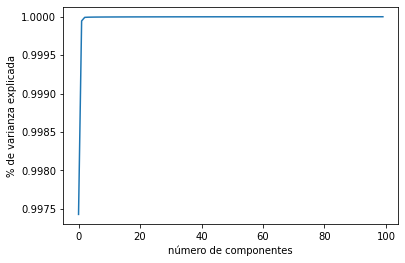

In [55]:
plot_explained_variance(components_count = 100, X = X_train)

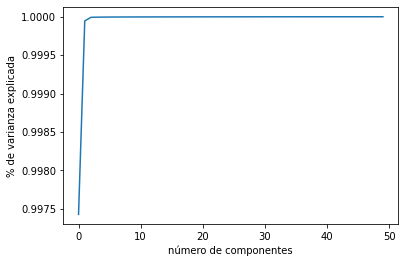

In [56]:
plot_explained_variance(components_count = 50, X = X_train)

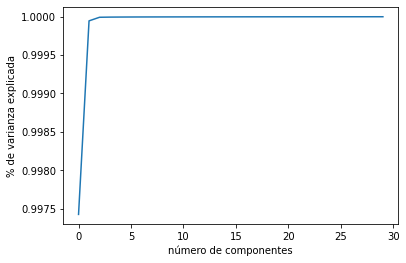

In [57]:
plot_explained_variance(components_count = 30, X = X_train)

## Ejercicio 8 - Proyección sobre las componentes principales del conjunto de entrenamiento

Construyamos un conjunto de entrenamiento y uno de test para una regresión lineal usando las primeras 30 componentes principales del conjunto de entrenamiento usado en la regresión lineal del ejercicio anterior.

In [85]:
model_pca = PCA(4).fit(X_train)
X_train_PCA = model_pca.transform(X_train)
X_test_PCA = model_pca.transform(X_test)

In [86]:
model_pca.n_components_

4

In [90]:
pca_loadings = pd.DataFrame(model_pca.components_.T, index=X.columns, columns=['PC1', 'PC2', 'PC3', 'PC4'],)
pca_loadings

,PC1,PC2,PC3,PC4
vehiculo_cilindrada,1.00,0.00,-0.00,-0.00
consumo_urbano,0.00,-0.00,1.00,-0.05
consumo_extraurbano,0.00,0.00,0.05,0.96
consumo_mixto,-0.00,1.00,0.00,-0.00
vehiculo_tipo_SUV,0.00,-0.00,-0.00,-0.00
...,...,...,...,...
vehiculo_standard_emision_EURO VI b,-0.00,-0.00,-0.00,-0.00
vehiculo_tipo_combustible_GAS OIL,0.00,-0.00,-0.01,0.06
vehiculo_tipo_combustible_NAFTA,-0.00,0.00,0.02,0.00
vehiculo_tipo_combustible_NAFTA / ELECTRICIDAD,0.00,-0.00,-0.01,-0.05


In [88]:
""" Para evitar notación científica en pandas"""

pd.options.display.float_format = '{:.2f}'.format

In [91]:
pca_loadings.T.dot(pca_loadings)
# multiplico matrices (producto interno) para calcular la covarianza entre PC1, PC2 y demás.

,PC1,PC2,PC3,PC4
PC1,1.00,-0.00,-0.00,-0.00
PC2,-0.00,1.00,-0.00,0.00
PC3,-0.00,-0.00,1.00,-0.00
PC4,-0.00,0.00,-0.00,1.00


In [92]:
df_pca = pd.DataFrame(model_pca.fit_transform(X),index=X.index, columns=['PC1', 'PC2', 'PC3', 'PC4'])
df_pca.head()

,PC1,PC2,PC3,PC4
0,2376.53,1.18,-3.49,0.38
1,-87.47,-1.60,0.62,-0.33
2,-86.47,-0.78,1.30,0.57
3,-86.46,-0.75,1.38,0.86
4,-486.47,-1.69,1.60,0.05


In [93]:
df_pca.shape

(406, 4)

In [94]:
import matplotlib.pyplot as plt

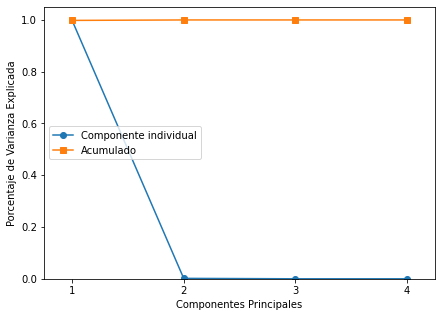

In [103]:
plt.figure(figsize=(7,5))

plt.plot([1,2,3,4], model_pca.explained_variance_ratio_, '-o', label='Componente individual')
plt.plot([1,2,3,4], np.cumsum(model_pca.explained_variance_ratio_), '-s', label='Acumulado')

plt.ylabel('Porcentaje de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.legend(loc=6);

## Ejercicio 9 - Regresión lineal sobre componentes principales

**6.1** Constuyamos un modelo de regresión lineal múltiple sobre los datasets de train y test usando como features la proyección sobre las componentes principales calculadas en el ejercicio anterior. ¿Qué supuesto podemos asegurar que se cumple usando las componentes principales como variables explicativas?

**6.2** Construyamos otro modelo usando regularización Lasso sobre los mismos features que en 6.1

**6.2** Construyamos un terecer modelo usando regularización Ridge sobre los mismos features que en 6.1

Para los tres modelos calculemos:
* mean_absolute_error
* mean_squared_error
* raiz cuadrada de mean_squared_error
* r2

In [59]:
# cada una de las "nuevas" variables después de PCA son independientes entre sí. 
# los supuestos de un modelo lineal requieren que nuestras variables independientes sean independientes entre sí. 
# Si ajustamos un modelo de regresión lineal con estas "nuevas" variables, este supuesto necesariamente se cumplirá.

linreg_pca = linear_model.LinearRegression()
linreg_pca.fit(X_train_PCA, y_train)
# linear_fit
Y_pred = linreg_pca.predict(X_test_PCA)

true_values = y_test
predicted_values = Y_pred

In [60]:
reg_pca_metrics = pd.Series([
                metrics.mean_absolute_error(true_values, predicted_values), 
                metrics.mean_squared_error(true_values, predicted_values),
                np.sqrt(metrics.mean_squared_error(true_values, predicted_values)),
                metrics.r2_score(true_values, predicted_values)])


reg_pca_metrics.index = ['Mean Absolute Error:', 'Mean Squared Error:', 'RMSE:', 'R2:']

print(reg_pca_metrics)

Mean Absolute Error:      8.176119
Mean Squared Error:     124.756287
RMSE:                    11.169435
R2:                       0.937488
dtype: float64


In [62]:
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train_PCA, y_train)
Y_pred = lasso.predict(X_test_PCA)

true_values = y_test
predicted_values = Y_pred

lasso_pca_metrics = pd.Series([
                metrics.mean_absolute_error(true_values, predicted_values), 
                metrics.mean_squared_error(true_values, predicted_values),
                np.sqrt(metrics.mean_squared_error(true_values, predicted_values)),
                metrics.r2_score(true_values, predicted_values)])


lasso_pca_metrics.index = ['Mean Absolute Error:', 'Mean Squared Error:', 'RMSE:', 'R2:']

print(lasso_pca_metrics)

Mean Absolute Error:      7.986739
Mean Squared Error:     120.709984
RMSE:                    10.986810
R2:                       0.939516
dtype: float64


In [64]:
ridge = linear_model.Ridge(alpha=0.1)
ridge.fit(X_train_PCA, y_train)
Y_pred = ridge.predict(X_test_PCA)

true_values = y_test
predicted_values = Y_pred

ridge_pca_metrics = pd.Series([
                metrics.mean_absolute_error(true_values, predicted_values), 
                metrics.mean_squared_error(true_values, predicted_values),
                np.sqrt(metrics.mean_squared_error(true_values, predicted_values)),
                metrics.r2_score(true_values, predicted_values)])


ridge_pca_metrics.index = ['Mean Absolute Error:', 'Mean Squared Error:', 'RMSE:', 'R2:']

print(ridge_pca_metrics)

Mean Absolute Error:      8.169556
Mean Squared Error:     124.633390
RMSE:                    11.163933
R2:                       0.937550
dtype: float64


In [65]:
metrics = pd.DataFrame([reg_metrics, lasso_metrics, ridge_metrics, 
                        reg_pca_metrics, lasso_pca_metrics, ridge_pca_metrics ])
metrics.index = ["regresion lineal", "lasso", "ridge", "pca - regresion lineal", "pca - lasso", "pca - ridge"]
metrics

,Mean Absolute Error:,Mean Squared Error:,RMSE:,R2:
regresion lineal,5.791800e+08,8.847770e+18,2.974520e+09,-4.433377e+15
lasso,8.547099e+00,1.296521e+02,1.138649e+01,9.350348e-01
ridge,9.539436e+00,1.530764e+02,1.237240e+01,9.232976e-01
pca - regresion lineal,8.176119e+00,1.247563e+02,1.116944e+01,9.374880e-01
pca - lasso,7.986739e+00,1.207100e+02,1.098681e+01,9.395155e-01
pca - ridge,8.169556e+00,1.246334e+02,1.116393e+01,9.375496e-01
